In [1]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Colours
cCA = '#0000cc' # Blue tone
cCH = '#006600' # Green tone

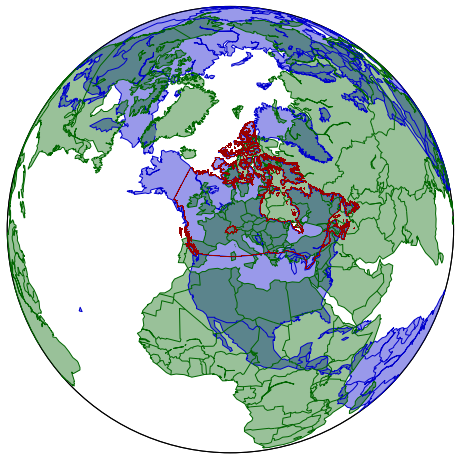

In [2]:
fig1b = plt.figure(figsize=(8, 8))

# Create basemaps for Canada and Switzerland
m_ca = Basemap(resolution='c', projection='ortho', lon_0=-110, lat_0=56)
m_ch = Basemap(resolution='c', projection='ortho', lon_0=8, lat_0=47)

# Draw coast lines
m_ca.drawcoastlines(color=cCA, linewidth=1)
m_ch.drawcoastlines(color=cCH, linewidth=1)

# Draw all country borders
m_ca.drawcountries(color=cCA, linewidth=1)
m_ch.drawcountries(color=cCH, linewidth=1)

# Fill continents and lakes
m_ca.fillcontinents(lake_color='none', color=cCA, alpha=.4)
m_ch.fillcontinents(lake_color='none', color=cCH, alpha=.4)


# Draw extra points for the Swiss and Canadian countries to highlight
CHE_adm0 = shapefile.Reader('../Webpages/blog-notebooks/data/basemap/CHE_adm0')
chlonlat = np.array(CHE_adm0.shape().points)
m_ch.plot(chlonlat[:, 0], chlonlat[:, 1] , ',', c='#990000', latlon=True, ms=1)

CAN_adm0 = shapefile.Reader('../Webpages/blog-notebooks/data/basemap/ne_10m_admin_0_countries')
idf = [i for i, s in enumerate(CAN_adm0.records()) if 'CA' in s][0]
dflonlat = np.array(CAN_adm0.shape(idf).points)
m_ca.plot(dflonlat[:, 0], dflonlat[:, 1], ',', c='#990000', latlon=True, ms=1)

plt.show()

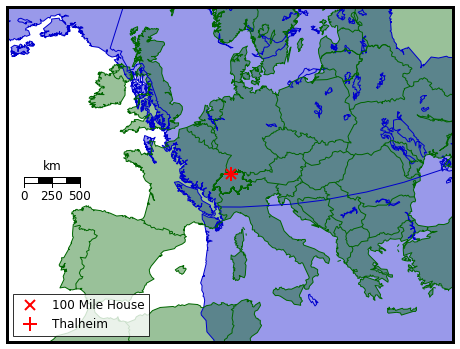

In [3]:
# 4000 km east-west, 3000 km north-south, low resolution, Transverse Mercator
width = 4000000
height = 3000000
res = 'l'
proj = 'tmerc'

fig1a = plt.figure(figsize=(8, 6))

# Create basemaps for Mexico and Switzerland
m_ca = Basemap(width=width, height=height, resolution=res, projection=proj,
            lon_0=-121.297222, lat_0=51.641944)
m_ch = Basemap(width=width, height=height, resolution=res, projection=proj,
            lon_0=8.1042, lat_0=47.4375)

# Draw coast lines
m_ca.drawcoastlines(color=cCA, linewidth=1)
m_ch.drawcoastlines(color=cCH, linewidth=1)

# Draw all country borders
m_ca.drawcountries(color=cCA, linewidth=1)
m_ch.drawcountries(color=cCH, linewidth=1)

# Fill continents and lakes
m_ca.fillcontinents(lake_color='none', color=cCA, alpha=.4)
m_ch.fillcontinents(lake_color='none', color=cCH, alpha=.4)

# Draw extra points for the Swiss border
CHE_adm0 = shapefile.Reader('../Webpages/blog-notebooks/data/basemap/CHE_adm0')
#CAN_adm0 = shapefile.Reader('data/basemap/MEX_adm0')

chlonlat = np.array(CHE_adm0.shape().points)
#calonlat = np.array(CAN_adm0.shape().points)

m_ch.plot(chlonlat[:, 0], chlonlat[:, 1] , '.', c=cCH, latlon=True, ms=1)
#m_ca.plot(calonlat[:, 0], calonlat[:, 1], '.', c=cCA, latlon=True, ms=1)

# Draw scales to cross-check that the scales are the same
# (shift scale 1600 km to the west from centre, and a bit north/south)
sca = np.array(m_ca(-121.297222, 51.641944,)) - np.array([1600000,  50000])
#sch = np.array(m_ch(8.1042, 47.4375)) - np.array([1600000, -350000])
isca = m_ca(sca[0], sca[1], inverse='True')
#isch = m_ch(sch[0], sch[1], inverse='True')

m_ca.drawmapscale(isca[0], isca[1], -121.297222, 51.641944,
                  500, barstyle='fancy', fillcolor2='#000000', fontsize=12)
#m_ch.drawmapscale(isch[0], isch[1], 8.1042, 47.4375,
#                  500, barstyle='fancy',  fillcolor2=cCH, fontsize=12)

# Add 100 Mile House and Thalheim AG
m_ca.plot(-121.297222, 51.641944, 'x', c='r', ms=10, mew=2, latlon=True, label='100 Mile House')
m_ch.plot(8.1042, 47.4375, '+', c='r', ms=14, mew=2, latlon=True, label='Thalheim')
lg = plt.legend(loc='lower left', fontsize=12, numpoints=1)
lg.get_frame().set_alpha(.8) # A little transparency

# Draw a thick border around the whole
m_ca.drawmapboundary(color='k', linewidth=3)

plt.show()